In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# Load the training data
train_df = pd.read_csv('train.csv')

# Load the testing data
test_df = pd.read_csv('test.csv')

In [3]:
# Print the first few rows of the data
print(train_df.head())

# Get the summary statistics of the data
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
254    255          20         3         70.0     8400       1     -1   
1066  1067          60         3         59.0     7837       1     -1   
799    800          50         3         60.0     7200       1     -1   
380    381          50         3         50.0     5000       1      1   
303    304          20         3         70.0     9800       1     -1   

      LotShape  LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  \
254          3            3          0  ...      -1     -1           -1   
1066         0            3          0  ...      -1     -1           -1   
799          3            3          0  ...      -1      2           -1   
380          3            3          0  ...      -1     -1           -1   
303          3            3          0  ...      -1      1           -1   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  TotalSF  TotalBath  
254         0       6    2010    

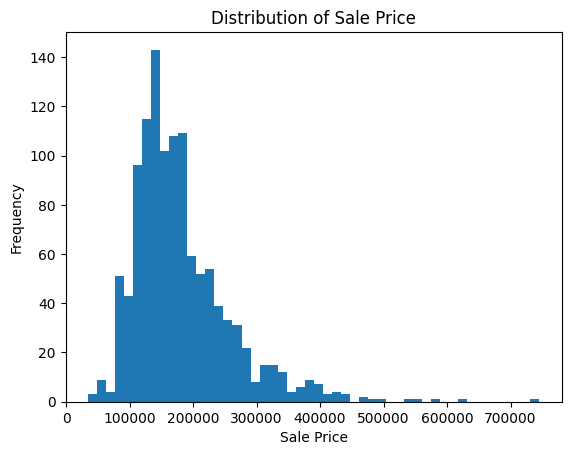

In [11]:
# Identify categorical variables
categorical_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=categorical_cols)

# Perform exploratory data analysis
print(X_train.head())
print(X_train.info())
print(X_train.describe())

# Visualize the distribution of the target variable
plt.hist(y_train, bins=50)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Convert categorical variables to numerical variables
categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in categorical_cols:
    train_df[col] = pd.Categorical(train_df[col]).codes
    test_df[col] = pd.Categorical(test_df[col]).codes

# Create new features
train_df['TotalSF'] = train_df['GrLivArea'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF']
test_df['TotalSF'] = test_df['GrLivArea'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF']

train_df['TotalBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath'] + train_df['FullBath'] + train_df['HalfBath']
test_df['TotalBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath'] + test_df['FullBath'] + test_df['HalfBath']

In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('SalePrice', axis=1), train_df['SalePrice'], test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)

(889, 82)
(1168,)


In [9]:
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)
from sklearn.utils import resample

X_train, y_train = resample(X_train, y_train, n_samples=min(len(X_train), len(y_train)))
# Create a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_pred = rf_model.predict(X_val)

# Evaluate the model
rf_mse = mean_squared_error(y_val, rf_pred)
print(f'Random Forest MSE: {rf_mse}')


ValueError: Found input variables with inconsistent numbers of samples: [889, 1168]